In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Reading

In [92]:
train = pd.read_csv('/Users/sungminhong/Documents/Kaggle/titanic/train.csv')
test = pd.read_csv('/Users/sungminhong/Documents/Kaggle/titanic/test.csv')

#### Concat으로 합치기

In [93]:
df = pd.concat([train,test], axis = 0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### Cabin 번호로 좌석 구역 데이터 열 만듬

In [94]:
df['Cabin_Grade'] = df['Cabin'].str[0]

#### Fare와 Cabin 구역의 관계 파악
Cabin 번호가 없는 사람들은 대부분 낮은 Fare 데이터를 가지고 있음</br>
그래서 새로운 Cabin 구역을 만듦

In [95]:
Fare_na = df['Fare'].loc[df['Cabin'].isna()]

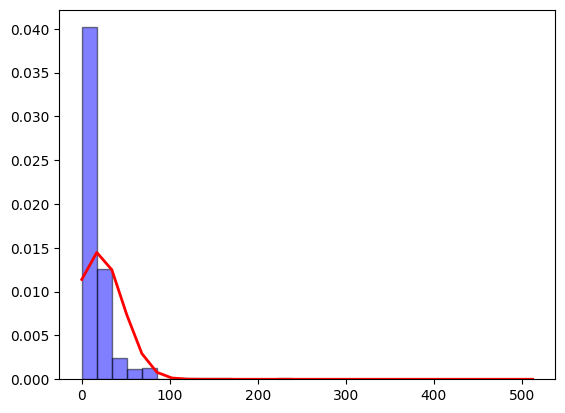

In [96]:
mu = Fare_na.mean()
sigma = Fare_na.std()
count, bins, ignored = plt.hist(Fare_na, 30, density=True, alpha=0.5, color='b', edgecolor='black')
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
# 그래프를 그려서 확인
# Cabin열에 결측치를 가지고 있는 사람들은 값싼 승선권을 가진 사람들

In [97]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Grade
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN


In [98]:
df.Cabin = df.Cabin.fillna('Q')
# 결측치를 모두 Q로 채움

In [99]:
df['Cabin_Grade'].loc[(df.Cabin == 'Q') & (df.Fare < 10)] = 'Q'
# Cabin이 결측 값이었던 사람들중 Fare가 10보다 작은 사람들의 Cabin 지역을 Q로 설정 

/var/folders/kh/6khx28zs2bq8wjptklpbkj440000gn/T/ipykernel_1456/3241266998.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Cabin_Grade'].loc[(df.Cabin == 'Q') & (df.Fare < 10)] = 'Q'
/var/folders/kh/6khx28zs2bq8wjptklpbkj440000gn/T/i

In [100]:
df['Cabin_Grade'].loc[(df.Cabin == 'Q') & (df.Fare >= 10)] = 'Z'
# Cabin이 결측 값이었던 사람들중 Fare가 10보다 큰 사람들의 Cabin 지역을 Z로 설정 

/var/folders/kh/6khx28zs2bq8wjptklpbkj440000gn/T/ipykernel_1456/3906352345.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Cabin_Grade'].loc[(df.Cabin == 'Q') & (df.Fare >= 10)] = 'Z'
/var/folders/kh/6khx28zs2bq8wjptklpbkj440000gn/T/

In [101]:
df.loc[df.Cabin_Grade.isna()]
# Cabin_Grade가 결측값인 행이 있는지 확인 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Grade
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Q,S,NaN


In [102]:
df.Fare = df.Fare.fillna(df.Fare.mean())
# Fare가 결측치로 되어 있는 행이 있어 Fare를 전체 Fare의 평균으로 채움

In [103]:
df['Cabin_Grade'].loc[(df.Cabin == 'Q') & (df.Fare < 10)] = 'Q'
# 다시 Cabin_Grade 결측값 채우기

/var/folders/kh/6khx28zs2bq8wjptklpbkj440000gn/T/ipykernel_1456/1228268828.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Cabin_Grade'].loc[(df.Cabin == 'Q') & (df.Fare < 10)] = 'Q'
/var/folders/kh/6khx28zs2bq8wjptklpbkj440000gn/T/i

In [104]:
df['Cabin_Grade'].loc[(df.Cabin == 'Q') & (df.Fare >= 10)] = 'Z'
# 다시 Cabin_Grade 결측값 채우기

/var/folders/kh/6khx28zs2bq8wjptklpbkj440000gn/T/ipykernel_1456/76041130.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Cabin_Grade'].loc[(df.Cabin == 'Q') & (df.Fare >= 10)] = 'Z'
/var/folders/kh/6khx28zs2bq8wjptklpbkj440000gn/T/ip

In [105]:
df.Fare.isna().value_counts()
# 다시 Fare에 결측값이 완전히 채워졌는지 확인

Fare
False    1309
Name: count, dtype: int64

#### Age열의 결측치를 Pclass 열의 데이터를 그룹화 하여 각 그룹의 평균을 결측치에 채워 넣음

In [106]:

mean_max_pclass1 = df['Age'].loc[df['Pclass'] == 1].mean()
mean_max_pclass2 = df['Age'].loc[df['Pclass'] == 2].mean()
mean_max_pclass3 = df['Age'].loc[df['Pclass'] == 3].mean()
# Pclass별 Age의 평균값 구하기

In [107]:
mean_max_pclass1

39.15992957746479

In [108]:
mean_max_pclass2

29.506704980842912

In [109]:
mean_max_pclass3

24.81636726546906

In [110]:
df.Age.dtypes

dtype('float64')

In [111]:
df.loc[(df['Pclass'] == 1) & (df['Age'].isnull()), 'Age'] = mean_max_pclass1
df.loc[(df['Pclass'] == 2) & (df['Age'].isnull()), 'Age'] = mean_max_pclass2
df.loc[(df['Pclass'] == 3) & (df['Age'].isnull()), 'Age'] = mean_max_pclass3
# Pclass 별 나이값 결측치 위치에 각 Pclass별 결측치 채우기

In [112]:
df['Age'].isna().value_counts()

Age
False    1309
Name: count, dtype: int64

In [113]:
df['Age'][df.Pclass == 2].fillna(mean_max_pclass2, inplace= True)

In [114]:
df['Age'].isna().value_counts()

Age
False    1309
Name: count, dtype: int64

In [115]:
df['Age'][df.Pclass == 3].fillna(mean_max_pclass3, inplace= True)

In [116]:
df['Age'].isna().value_counts()

Age
False    1309
Name: count, dtype: int64

In [117]:
df.isna().value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked  Cabin_Grade
False        False     False   False  False  False  False  False  False   False  False  False     False          889
             True      False   False  False  False  False  False  False   False  False  False     False          418
             False     False   False  False  False  False  False  False   False  False  True      False            2
Name: count, dtype: int64

In [118]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Grade
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Q,S,Q
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Q,S,Q
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Q,S,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,24.816367,0,0,A.5. 3236,8.0500,Q,S,Q
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,Q,S,Q
416,1308,NaN,3,"Ware, Mr. Frederick",male,24.816367,0,0,359309,8.0500,Q,S,Q


In [119]:
df.Ticket.value_counts()

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: count, Length: 929, dtype: int64

In [ ]:
df = df.drop(['PassengerId', 'Name','Ticket', 'Cabin'], axis = 1)
#학습에 필요없는 열 제거

In [121]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Grade
0,0.0,3,male,22.000000,1,0,7.2500,S,Q
1,1.0,1,female,38.000000,1,0,71.2833,C,C
2,1.0,3,female,26.000000,0,0,7.9250,S,Q
3,1.0,1,female,35.000000,1,0,53.1000,S,C
4,0.0,3,male,35.000000,0,0,8.0500,S,Q
...,...,...,...,...,...,...,...,...,...
413,NaN,3,male,24.816367,0,0,8.0500,S,Q
414,NaN,1,female,39.000000,0,0,108.9000,C,C
415,NaN,3,male,38.500000,0,0,7.2500,S,Q
416,NaN,3,male,24.816367,0,0,8.0500,S,Q


In [122]:
df_ohe = pd.get_dummies(df, dtype = int)
# One Hot encoding

In [123]:
X = df_ohe[:len(train)]
test = df_ohe[len(train):]
# train 데이터와 test 데이터 나눔


In [124]:
X

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Cabin_Grade_A,Cabin_Grade_B,Cabin_Grade_C,Cabin_Grade_D,Cabin_Grade_E,Cabin_Grade_F,Cabin_Grade_G,Cabin_Grade_Q,Cabin_Grade_T,Cabin_Grade_Z
0,0.0,3,22.000000,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1,38.000000,1,0,71.2833,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,3,26.000000,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,1,35.000000,1,0,53.1000,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,3,35.000000,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.000000,0,0,13.0000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1.0,1,19.000000,0,0,30.0000,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
888,0.0,3,24.816367,1,2,23.4500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1.0,1,26.000000,0,0,30.0000,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [125]:
test

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Cabin_Grade_A,Cabin_Grade_B,Cabin_Grade_C,Cabin_Grade_D,Cabin_Grade_E,Cabin_Grade_F,Cabin_Grade_G,Cabin_Grade_Q,Cabin_Grade_T,Cabin_Grade_Z
0,NaN,3,34.500000,0,0,7.8292,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,NaN,3,47.000000,1,0,7.0000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,NaN,2,62.000000,0,0,9.6875,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,NaN,3,27.000000,0,0,8.6625,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,3,22.000000,1,1,12.2875,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,24.816367,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
414,NaN,1,39.000000,0,0,108.9000,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
415,NaN,3,38.500000,0,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
416,NaN,3,24.816367,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y = X['Survived']
X = X.drop('Survived', axis = 1)
# train 데이터 학습용과 라벨로 분리

In [127]:
test = test.drop('Survived', axis = 1)

In [128]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_Grade_A,Cabin_Grade_B,Cabin_Grade_C,Cabin_Grade_D,Cabin_Grade_E,Cabin_Grade_F,Cabin_Grade_G,Cabin_Grade_Q,Cabin_Grade_T,Cabin_Grade_Z
0,3,22.000000,1,0,7.2500,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,38.000000,1,0,71.2833,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,3,35.000000,0,0,8.0500,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
888,3,24.816367,1,2,23.4500,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0


In [129]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_Grade_A,Cabin_Grade_B,Cabin_Grade_C,Cabin_Grade_D,Cabin_Grade_E,Cabin_Grade_F,Cabin_Grade_G,Cabin_Grade_Q,Cabin_Grade_T,Cabin_Grade_Z
0,3,34.500000,0,0,7.8292,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,47.000000,1,0,7.0000,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,2,62.000000,0,0,9.6875,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,3,27.000000,0,0,8.6625,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,3,22.000000,1,1,12.2875,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,24.816367,0,0,8.0500,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
414,1,39.000000,0,0,108.9000,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
415,3,38.500000,0,0,7.2500,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
416,3,24.816367,0,0,8.0500,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


#### Train Test Split

In [130]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [131]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.2, random_state= 10)

In [132]:
train_X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_Grade_A,Cabin_Grade_B,Cabin_Grade_C,Cabin_Grade_D,Cabin_Grade_E,Cabin_Grade_F,Cabin_Grade_G,Cabin_Grade_Q,Cabin_Grade_T,Cabin_Grade_Z
57,3,28.500000,0,0,7.2292,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
717,2,27.000000,0,0,10.5000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
431,3,24.816367,1,0,16.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
633,1,39.159930,0,0,0.0000,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
163,3,17.000000,0,0,8.6625,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,24.000000,0,0,69.3000,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
320,3,22.000000,0,0,7.2500,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
527,1,39.159930,0,0,221.7792,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
125,3,12.000000,1,0,11.2417,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1


In [133]:
test_X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_Grade_A,Cabin_Grade_B,Cabin_Grade_C,Cabin_Grade_D,Cabin_Grade_E,Cabin_Grade_F,Cabin_Grade_G,Cabin_Grade_Q,Cabin_Grade_T,Cabin_Grade_Z
590,3,35.00000,0,0,7.1250,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
131,3,20.00000,0,0,7.0500,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
628,3,26.00000,0,0,7.8958,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
195,1,58.00000,0,0,146.5208,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
230,1,35.00000,1,0,83.4750,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,1,65.00000,0,0,26.5500,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
191,2,19.00000,0,0,13.0000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
603,3,44.00000,0,0,8.0500,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
94,3,59.00000,0,0,7.2500,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


In [134]:
train_y = train_y.astype(bool)
train_y

57     False
717     True
431     True
633    False
163    False
       ...  
369     True
320    False
527    False
125     True
265    False
Name: Survived, Length: 712, dtype: bool

In [135]:
test_y = test_y.astype(bool)
test_y

590    False
131    False
628    False
195     True
230     True
       ...  
456    False
191    False
603    False
94     False
766    False
Name: Survived, Length: 179, dtype: bool

In [136]:
import tensorflow as tf
from tensorflow.keras import layers


Tensorflow 모델 정의

In [138]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation= 'relu', input_shape=(20,)),
    tf.keras.layers.Dense(48, activation= 'relu'),
    tf.keras.layers.Dense(24, activation= 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Tensorflow 모델 Compile

In [139]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Tensorflow 모델 학습 시작

In [140]:
model.fit(train_X, train_y, epochs=50, batch_size=30)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.5464 - loss: 1.1763
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.6464 - loss: 0.6418
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.7211 - loss: 0.5714
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - accuracy: 0.7049 - loss: 0.6004
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.6581 - loss: 0.6032
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.7223 - loss: 0.5467
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.7279 - loss: 0.5290
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.7612 - loss: 0.5143
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.7624 - loss: 0.5135
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.6832 - loss: 0.5888
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.7759 - loss: 0.4911
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step

모델 평가

In [141]:
loss, accuracy = model.evaluate(test_X , test_y)
print('Accuracy:', accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.8145 - loss: 0.4060
Accuracy: 0.8044692873954773


학습된 모델로 예측 

In [142]:
predictions = model.predict(test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [143]:
predictions = (predictions >0.5).astype(int)

In [144]:
predictions

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [145]:
submiss = pd.read_csv('/Users/sungminhong/Documents/Kaggle/titanic/gender_submission.csv')

In [146]:
submiss['Survived'] = predictions

In [147]:
submiss.to_csv('/Users/sungminhong/Documents/Kaggle/titanic/gender_submission.csv', index = False)